In [2]:
#1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 读取数据并预处理
data = pd.read_csv("C:/Users/32535/Desktop/bike.csv")  
data = data.drop(columns=["id"])  # 删除 id 列
data = data[data["city"] == 1]  # 筛选上海数据
data = data.drop(columns=["city"])  # 删除 city 列
data["hour"] = data["hour"].apply(lambda x: 1 if 6 <= x <= 18 else 0)  # 归类 hour 列
y = data.pop("y").values.reshape(-1, 1)  # 提取 y 列并转换为列向量
X = data.values  # 转换为 Numpy 数组
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#划分训练集和测试集
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()# 归一化数据

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

#构建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 模型评估
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 0.16527999285399628


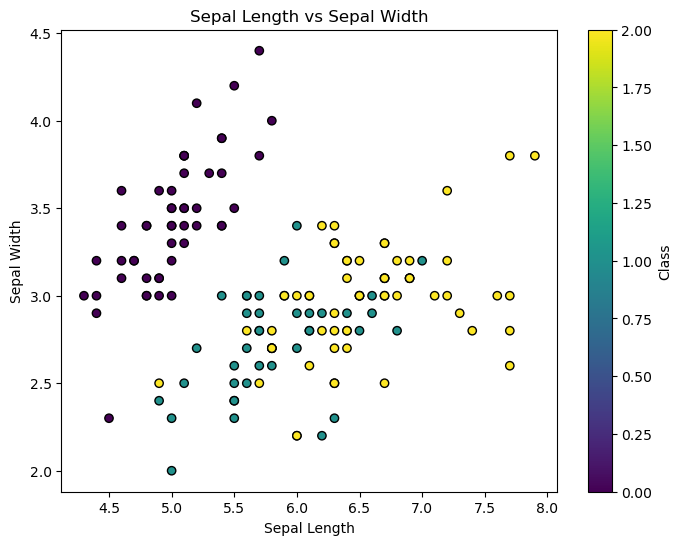

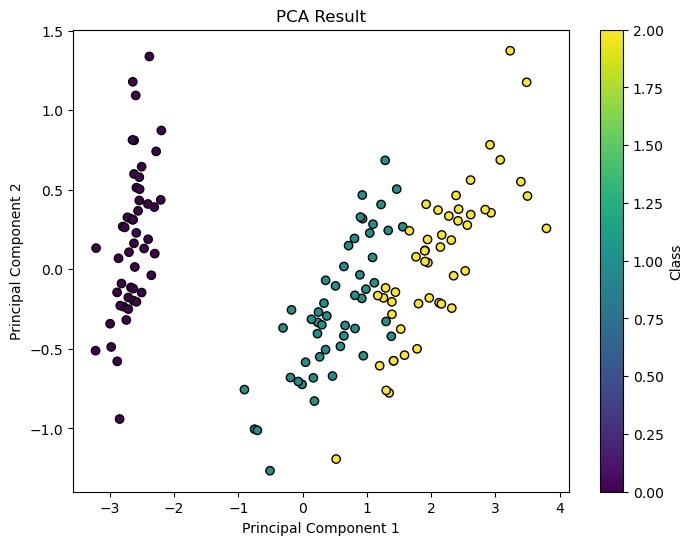

KNN Classification Accuracy: 1.0


In [3]:
#2
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#  加载鸢尾花数据集并划分
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 绘制花萼特征的散点图
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.colorbar(label="Class")
plt.show()

# PCA降维并可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result")
plt.colorbar(label="Class")
plt.show()

#训练 KNN 分类器并评估
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Classification Accuracy:", accuracy)
